       Airline  AirlineID Source Destination    Route  Total_Stops  \
0       IndiGo          3    BLR         DEL  BLR-DEL            0   
1    Air India          1    CCU         BLR  CCU-BLR            2   
2  Jet Airways          4    DEL         COK  DEL-COK            2   
3       IndiGo          3    CCU         BLR  CCU-BLR            1   
4       IndiGo          3    BLR         DEL  BLR-DEL            1   

     DepartureDatetime      ArrivalDatetime  DurationMinutes  DayOfWeek  \
0  2019-03-24 22:20:00  2019-03-24 01:10:00              170          6   
1  2019-05-01 05:50:00  2019-05-01 13:15:00              445          2   
2  2019-06-09 09:25:00  2019-06-09 04:25:00             1140          6   
3  2019-05-12 18:05:00  2019-05-12 23:30:00              325          6   
4  2019-03-01 16:50:00  2019-03-01 21:35:00              285          4   

   IsWeekend  Price  
0          1   3897  
1          0   7662  
2          1  13882  
3          1   6218  
4          0  1330

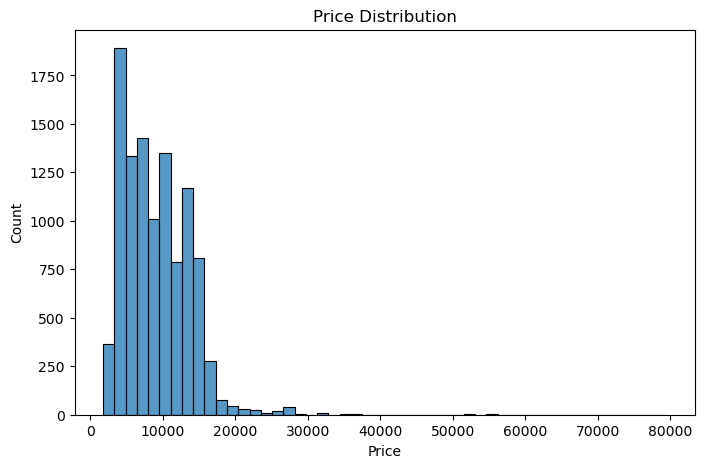

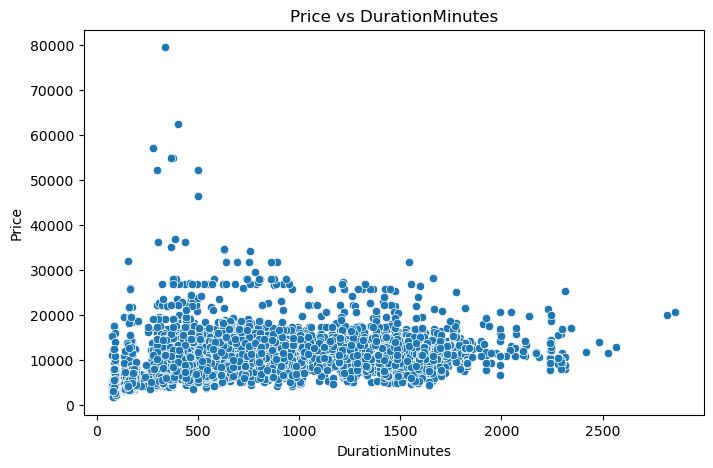

Mean Squared Error: 13744463.84
R^2 Score: 0.35


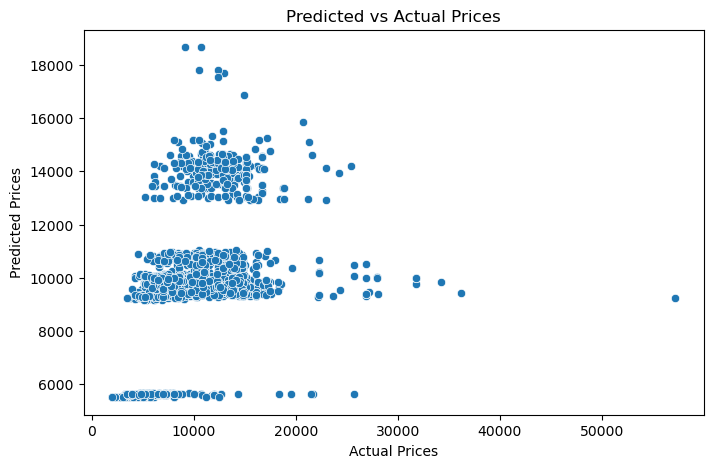

In [6]:
# Step 1: Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
df = pd.read_csv('../data/flight_dataset_processed_iata.csv')

# Step 3: Quick exploration
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Step 4: Simple visualization of target
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50)
plt.title("Price Distribution")
plt.show()

# Scatter plot of Duration vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='DurationMinutes', y='Price')
plt.title("Price vs DurationMinutes")
plt.show()

# Step 5: Preprocessing
# Fill missing numeric values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Step 6: Split features and target
# Features: we can start simple with 'DurationMinutes' and 'Total_Stops' encoded numerically
# Convert 'Total_Stops' to numeric if necessary
df['Total_Stops'] = df['Total_Stops'].replace('non-stop', 0).replace('1 stop', 1).replace('2 stops', 2).replace('3 stops', 3)
# You can add more features later (like DayOfWeek, IsWeekend, etc.)

features = ['DurationMinutes', 'Total_Stops']
target = 'Price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Step 9: Optional - plot predictions vs actual
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()
